# Indexing Operations

In [2]:
import sys
import os

import pandas as pd
import numpy as np
import pyarrow as pa
sys.path.append(os.path.abspath(".."))

from extras.utils import load_vehicle_data

## Loading Data

In [ ]:
df = load_vehicle_data()
# Generating Series
city_mpg = df.city08
highway_mpg = df.highway08
make = df.make

## Prepping the Data and Renaming the Index
We'll rename the index to a string type to make the process more easy to follow

In [5]:
city2 = city_mpg.rename(make.to_dict())
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64[pyarrow]

In [6]:
city2.index

Index(['Alfa Romeo', 'Ferrari', 'Dodge', 'Dodge', 'Subaru', 'Subaru', 'Subaru',
       'Toyota', 'Toyota', 'Toyota',
       ...
       'Saab', 'Saturn', 'Saturn', 'Saturn', 'Saturn', 'Subaru', 'Subaru',
       'Subaru', 'Subaru', 'Subaru'],
      dtype='object', length=41144)

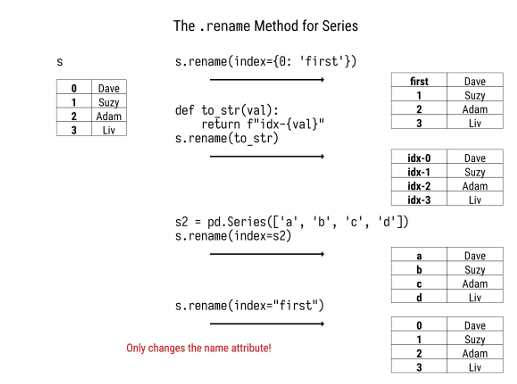

If we pass another series to the rename method and the series has the same index, the index is renamed to the series value.

In [8]:
city2 = city_mpg.rename(make)
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64[pyarrow]

If on the otherhand a scalar is passed, the .name attribute of the series will change, not the values.

In [9]:
city2.rename("citympg")

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: citympg, Length: 41144, dtype: int64[pyarrow]

## Resetting the Index

In [10]:
print(city2.reset_index())

            index  city08
0      Alfa Romeo      19
1         Ferrari       9
2           Dodge      23
3           Dodge      10
4          Subaru      17
...           ...     ...
41139      Subaru      19
41140      Subaru      20
41141      Subaru      18
41142      Subaru      18
41143      Subaru      16

[41144 rows x 2 columns]


The previous method brings the index as a new column. To avoid this, we can simply drop it:

In [11]:
city2.reset_index(drop=True)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64[pyarrow]

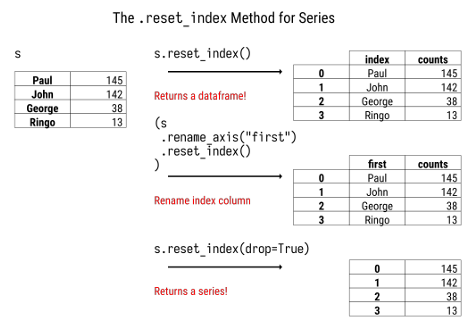

## The .loc attribute

The .loc attribute deals with index labels. The following can be passed to .loc:
- A scalar value of one of the index
- A list of index labels
- A slice of labels
- An index
- A boolean array
- A function that accepts series and returns one of the above

In [12]:
city2.loc["Subaru"]

Subaru    17
Subaru    21
Subaru    22
Subaru    19
Subaru    20
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 885, dtype: int64[pyarrow]

In [14]:
city2.loc["Fisker"]

20

The returned above are a series and a scalar. Note has to be taken when .loc is used! However, to avoid scalar values, the value can be passed as a list

In [15]:
city2.loc[["Fisker"]]

Fisker    20
Name: city08, dtype: int64[pyarrow]

In [16]:
city2.loc[["Ferrari", "Lamborghini"]]

Ferrari         9
Ferrari        12
Ferrari        11
Ferrari        10
Ferrari        11
               ..
Lamborghini     6
Lamborghini     8
Lamborghini     8
Lamborghini     8
Lamborghini     8
Name: city08, Length: 357, dtype: int64[pyarrow]

Although not typical, list slicing is a possibility with Series, BUT the series needs to be sorted first or a KeyError will occur:

In [17]:
city2.loc["Ferrari":"Lamborghini"]

KeyError: "Cannot get left slice bound for non-unique label: 'Ferrari'"

In [18]:
city2.sort_index().loc["Ferrari":"Lamborghini"]

Ferrari        10
Ferrari        13
Ferrari        13
Ferrari         9
Ferrari        10
               ..
Lamborghini    12
Lamborghini     9
Lamborghini     8
Lamborghini    13
Lamborghini     8
Name: city08, Length: 11210, dtype: int64[pyarrow]

Also, note that here the slicing considers the ending value as closed (i.e. it includes is), not as seen on string or list slicing in Python

Additionally, strings not included as index values can be used for slicing, So for example if we slice from F to L, Lamborghini wouldn't be included as it comes after the lone letter L

In [19]:
city2.sort_index().loc["F":"L"]

Federal Coach    15
Federal Coach    13
Federal Coach    13
Federal Coach    14
Federal Coach    13
                 ..
Kia              25
Kia              21
Kia              15
Kia              19
Koenigsegg       11
Name: city08, Length: 11093, dtype: int64[pyarrow]

A pandas Index can also be passed and it's useful when more than one pandas object has the same index, but index duplication needs to be checked!

In [20]:
idx = pd.Index(["Dodge"])
city2.loc[idx]

Dodge    23
Dodge    10
Dodge    12
Dodge    11
Dodge    11
         ..
Dodge    18
Dodge    17
Dodge    14
Dodge    14
Dodge    11
Name: city08, Length: 2583, dtype: int64[pyarrow]

In [ ]:
# Generates double the amount of entries!
idx = pd.Index(["Dodge", "Dodge"])
city2.loc[idx]

Dodge    23
Dodge    10
Dodge    12
Dodge    11
Dodge    11
         ..
Dodge    18
Dodge    17
Dodge    14
Dodge    14
Dodge    11
Name: city08, Length: 5166, dtype: int64[pyarrow]

masks are a very useful way to slice series! They are boolean arrays of the same length of the index

In [22]:
mask = city2 > 50
city2.loc[mask]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64[pyarrow]

Passing functions is a very useful operation for dataframes (series might be a bit of an overkill), specially when doing chained operations

In [23]:
cost = pd.Series([1.00, 2.25, 3.99, .99, 2.79],
                 index=['Gum', 'Cookie', 'Melon', 'Roll', 'Carrots'])
inflation = 1.10

In [24]:
(
    cost
    .mul(inflation)
    .loc[lambda x: x > 3]
)

Melon      4.389
Carrots    3.069
dtype: float64

If the above where done in a different order, results would be wrong:

In [25]:
mask = cost > 3
(
    cost
    .mul(inflation)
    .loc[mask]
)

Melon    4.389
dtype: float64

## The .iloc attribute

Analogous to .loc, but with some differences. This pulls out items by the index POSITION. The .iloc attribute supports:
- A scalar index (integer)
- A list of index positions
- A slice of positions (half open interval)
- a NumPy array or python list of boolean values
- A function that accepts a series and returns one of the above 

In [26]:
# This gets the first result
city2.iloc[0]

19

In [27]:
# Last result
city2.iloc[-1]

16

In [30]:
# Same as above
city2.iloc[len(city2)-1]

16

A list of positions can be passed to get a series

In [31]:
city2.iloc[[0]]

Alfa Romeo    19
Name: city08, dtype: int64[pyarrow]

In [32]:
city2.iloc[[0,1,-1]]

Alfa Romeo    19
Ferrari        9
Subaru        16
Name: city08, dtype: int64[pyarrow]

In [34]:
# Slicing like normal python, i.e. does not include the last number
city2.iloc[0:5]

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
Name: city08, dtype: int64[pyarrow]

In [35]:
# Getting the last 7 values
city2.iloc[-7:]

Saturn    24
Saturn    21
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64[pyarrow]

As mentioned above, you can use a NumPy array of booleans (or Python list), but not a boolean array (a series with booleans)

In [36]:
mask = city2 > 50
city2.iloc[mask]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [37]:
# Converting mask to numpy array works
city2.iloc[mask.to_numpy()]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64[pyarrow]

In [39]:
# Same for lists
city2.iloc[mask.to_list()]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64[pyarrow]

## Heads and Tails

It's best to use this approach than iloc if we want to get first or last values

In [40]:
city2.head(3)

Alfa Romeo    19
Ferrari        9
Dodge         23
Name: city08, dtype: int64[pyarrow]

In [41]:
city2.tail(3)

Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64[pyarrow]

## Sampling

It's often to get a sample rather than just check first or last values anyways

In [42]:
city2.sample(6, random_state=42)

Volvo         16
Mitsubishi    19
Buick         27
Jeep          15
Land Rover    13
Saab          17
Name: city08, dtype: int64[pyarrow]

## Filtering Index Values

The .filter method filters index labels by exact match, substring or regex. These are controlled by the mutually exclusive items, like and regex params. NOTE that exact match using items fails when there are duplicate index labels

In [ ]:
city2.filter(items=["Ford"])

ValueError: cannot reindex on an axis with duplicate labels

In [45]:
city2.filter(like='rd')

Ford    18
Ford    16
Ford    17
Ford    17
Ford    15
        ..
Ford    26
Ford    19
Ford    21
Ford    18
Ford    19
Name: city08, Length: 3371, dtype: int64[pyarrow]

In [44]:
city2.filter(regex='(Ford)')

Ford    18
Ford    16
Ford    17
Ford    17
Ford    15
        ..
Ford    26
Ford    19
Ford    21
Ford    18
Ford    19
Name: city08, Length: 3371, dtype: int64[pyarrow]

## Reindexing

The .reindex method can pull values by index labels. Note that if the passed labels are not in the index, it won't error, it'll return missing values. It is also worth noting that the method doesn't accept duplicate index labels.

In [49]:
# Won't work because this series have duplicate index labels!
city2.reindex(["Whatever"])

ValueError: cannot reindex on an axis with duplicate labels

In [53]:
city_mpg.reindex([0, len(city_mpg)-1, "Whatever"])

0             19
41143         16
Whatever    <NA>
Name: city08, dtype: int64[pyarrow]

This method is very useful if there's a series with portions of index labels that are the same and we want to index one to the other

In [54]:
s1 = pd.Series([10,20,30], index=["a","b","c"])
s2 = pd.Series([15,25,35], index=["b","c","d"])

In [55]:
s1

a    10
b    20
c    30
dtype: int64

In [56]:
s2

b    15
c    25
d    35
dtype: int64

In [57]:
s2.reindex(s1.index)

a     NaN
b    15.0
c    25.0
dtype: float64

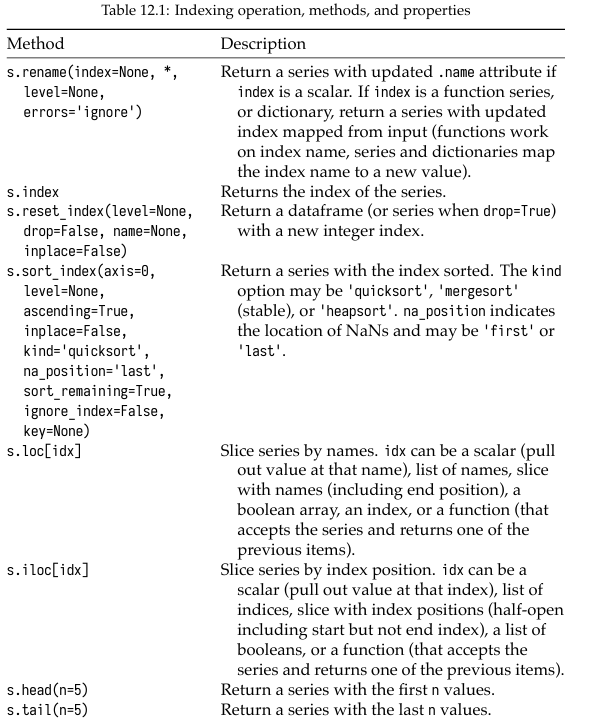

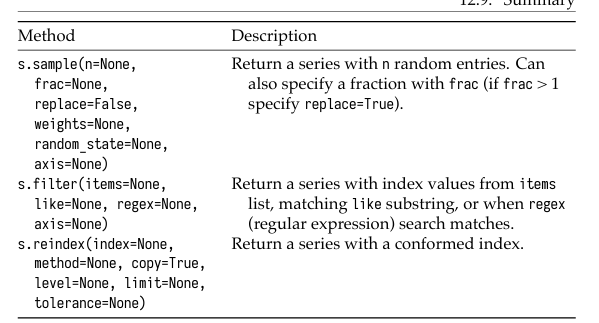

## Excercises
With a dataset of your choice:

### 1. Inspect the index

In [60]:
make.index

RangeIndex(start=0, stop=41144, step=1)

### 2. Sort the index

In [61]:
make.sort_index()

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: string[pyarrow]

### 3. Set the index to monotonically increasing integers starting from 0

In [63]:
make.reset_index(drop=True)

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: string[pyarrow]

### 4. Set the index to monotonically increasing integers starting from 0, then convert these to the string version. Save this a s2

In [67]:
def to_str(val):
    return f"index {val}"

In [70]:
s2 = make.rename(to_str)
s2

index 0        Alfa Romeo
index 1           Ferrari
index 2             Dodge
index 3             Dodge
index 4            Subaru
                  ...    
index 41139        Subaru
index 41140        Subaru
index 41141        Subaru
index 41142        Subaru
index 41143        Subaru
Name: make, Length: 41144, dtype: string[pyarrow]

### 5. Using s2, pull out the first five entries.

In [71]:
s2.head(5)

index 0    Alfa Romeo
index 1       Ferrari
index 2         Dodge
index 3         Dodge
index 4        Subaru
Name: make, dtype: string[pyarrow]

### 6. Using s2, pull out the last five entries.

In [72]:
s2.tail(5)

index 41139    Subaru
index 41140    Subaru
index 41141    Subaru
index 41142    Subaru
index 41143    Subaru
Name: make, dtype: string[pyarrow]

### 7. Using s2, pull out one hundred entries starting at index position 10.

In [73]:
s2.iloc[10:110]

index 10         Toyota
index 11     Volkswagen
index 12     Volkswagen
index 13     Volkswagen
index 14          Dodge
                ...    
index 105        Toyota
index 106        Toyota
index 107    Volkswagen
index 108    Volkswagen
index 109    Volkswagen
Name: make, Length: 100, dtype: string[pyarrow]

###  8. Using s2, create a series with values with index entries '20', '10', and '2'.

In [76]:
s2.filter(items=["index 20", "index 10", "index 2"])

index 20       BMW
index 10    Toyota
index 2      Dodge
Name: make, dtype: string[pyarrow]